<a href="https://colab.research.google.com/github/sunnywood0906/Programming-Language/blob/main/programming_languagehw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
# 隨機生成100筆youtube資料並印出
np.random.seed(42)
n_samples = 100
data = {
    'views': np.random.randint(1_000, 1_000_000, size=n_samples),
    'likes': np.random.randint(50, 100_000, size=n_samples),
    'dislikes': np.random.randint(0, 10_000, size=n_samples),
    'comments': np.random.randint(0, 50_000, size=n_samples),
    'duration_sec': np.random.randint(30, 3600, size=n_samples),
    'title_length': np.random.randint(10, 100, size=n_samples),
    'description_length': np.random.randint(0, 3000, size=n_samples),
    'tags_count': np.random.randint(1, 30, size=n_samples),
}
df = pd.DataFrame(data)
pd.set_option('display.max_rows', 100)  # 顯示 100 列
pd.set_option('display.max_columns', None)  # 顯示所有欄位
print(df)


     views  likes  dislikes  comments  duration_sec  title_length  \
0   122958  65747      5450      6295           814            98   
1   672155  37115      1663     12183          3205            10   
2   132932  92143      9721     29299          3494            25   
3   366838  99349      5592     12874           275            70   
4   260178  32656      7392     32711          3277            73   
5   645167  11584      1306      5539          3140            72   
6   111268  94713      6776     42405          1530            78   
7   733180  40447      5864     48354          1735            31   
8    55886  91437      9474      2557          2836            76   
9   138337   1066      7526     38360           567            85   
10  522430  89839      8901     16482          1920            35   
11  955698  55641      5575      2200          1871            25   
12   88498  89862      5530     46940           950            60   
13  900159  23297      4413      2

In [4]:
# 🔄 標準化
#因為各欄位數值差異很大（觀看數 vs 喜歡數 vs 標題長度），會影響聚類結果
#所以把每個特徵轉換成平均為0、標準差為1的標準化形式
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [14]:
# KMeans將資料自動分成 4 群
#KMeans的目的是找出資料中相似的點，把它們歸類成同一群
#3群較常見，但為了將中間層區分所以分4群
selected_features = [
    'views',                # 觀看數：人氣指標
    'likes',                # 喜歡數：互動正面程度
    'comments',               # 留言數：用戶參與度
    'duration_sec',             # 時長：影片類型（短 or 長）
    'description_length',          # 說明欄長度：內容深度
    'tags_count'               # 標籤數：影片分類與曝光關鍵字
]
X_scaled = scaler.fit_transform(df[selected_features])

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [15]:
# 📉 PCA 降維成 2 維
#原始資料很多欄所以降成2維比較好畫圖
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

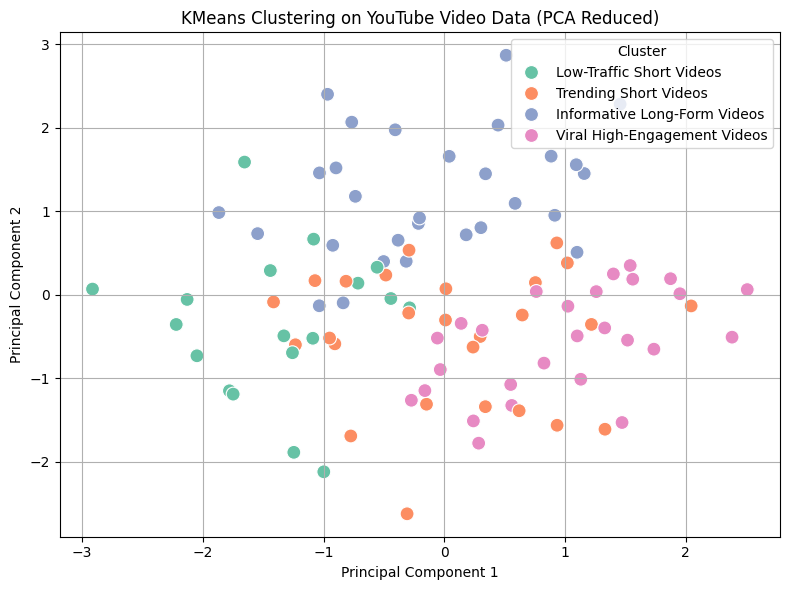

In [22]:
# 🎨 視覺化聚類結果
# 點狀圖越右上是互動越高的影片，越左下是互動越低的影片

cluster_labels = {
    0: 'Low-Traffic Short Videos',      # 冷門短片組
    1: 'Trending Short Videos',         # 熱門短影片組
    2: 'Informative Long-Form Videos',  # 教學型長片組
    3: 'Viral High-Engagement Videos'   # 高互動爆紅影片組
}

ordered_labels = [
    'Low-Traffic Short Videos',
    'Trending Short Videos',
    'Informative Long-Form Videos',
    'Viral High-Engagement Videos'
]

# 先建立群組名稱欄位
df['cluster_name'] = df['cluster'].map(cluster_labels)

# 再指定顯示順序
df['cluster_name'] = pd.Categorical(df['cluster_name'], categories=ordered_labels, ordered=True)

# 畫圖
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_name', palette='Set2', s=100)
plt.title('KMeans Clustering on YouTube Video Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()